#Importando as principais bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#lendo o arquivo titanic_train.csv em um dataframe pandas

In [2]:
train = pd.read_csv('../input/titanic-train/titanic_train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Analise exploratoria dos dados

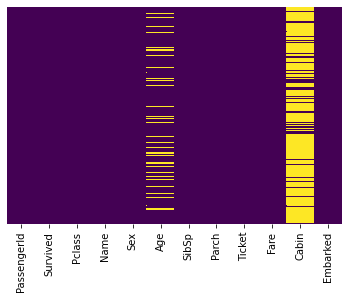

In [4]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


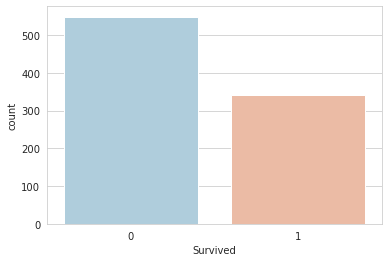

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

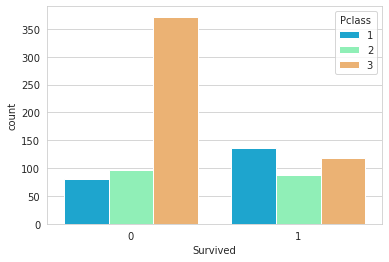

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
# aqui vemos que o maior indice de mortes foram dos passageiros da classe economica.

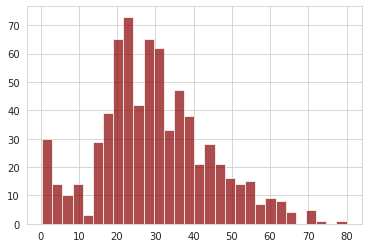

In [7]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

In [8]:
train.drop('Cabin', axis = 1, inplace = True)

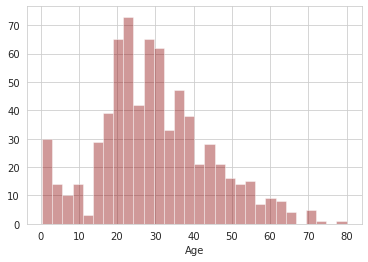

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

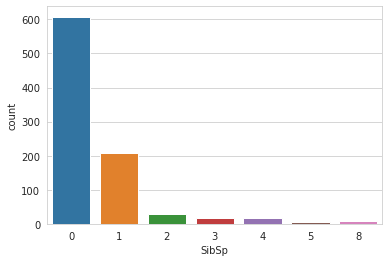

In [10]:
sns.countplot(x='SibSp',data=train)

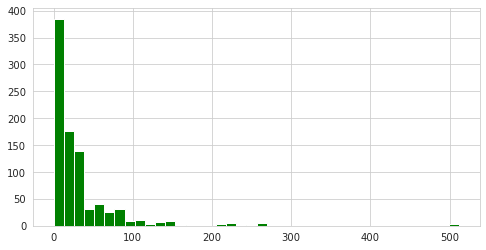

In [11]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#Limpando os dados
#Queremos preencher dados de idade faltantes, em vez de simplesmente deixar cair as linhas de dados de idade que faltam.

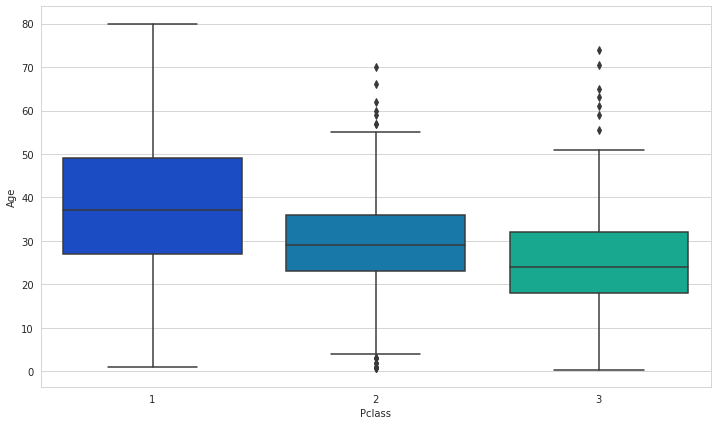

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#convertendo dados categoricos
#agora vamos converter alguns dados categoricos para que se possa trabalhar eles com machine learning

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
sex = pd.get_dummies(train['Sex'], drop_first = True)


In [18]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [19]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [20]:
train = pd.concat([train,sex,embark], axis = 1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#contruindo um modelo de regresão logistica
#vamos dividir nossos dados em dados de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.30, random_state = 101)

In [24]:
from sklearn.linear_model import LogisticRegression

#treinando e predizendo

In [25]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
predictions = logmodel.predict(x_test)

#avaliação

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



#obteve 77 por cento de precisão

#vamos tentar obter um resultado melhor usando arvores de decisão

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
pred = dtree.predict(x_test)

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       154
           1       0.73      0.63      0.68       114

    accuracy                           0.74       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators = 100)

In [37]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
rfc_pred = rfc.predict(x_test)

In [39]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       154
           1       0.85      0.72      0.78       114

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



#a precisão aumentou ligeiramente